# **DATA PREPARATION**

In [75]:
#Importing libraries and checking versuions

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import scipy

import sys


In [76]:
#Loading the dataset
names = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class']
df = pd.read_csv('iris.csv')
df.columns = names

In [77]:
#Checking and understanding our dataset

print(df.shape)
print(df.info())
print(df.size)

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
750


In [78]:
#Previewing the fist 10 and last 10 rows of our dataset

print(df.head(10))
print(df.tail(10))

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width   Class
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa
     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width      Class
140           6.7          3.1           5.6          2.4  Virginica
141           6.9          3.1           5.1          2.3  Virginica
142           5.8          2.7           5.1          1.9  Virginica
143           6.8   

In [79]:
#Statstical summary of the dataset

df.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
#Finding the size of each instance

df.groupby('Class').size()

Class
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

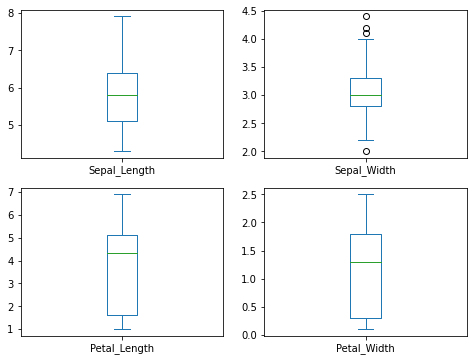

In [81]:
#Using Unvariant plots to understand the dats
#EXAMPLE 1
#Using a box plot
df.plot(kind='box', subplots = True, layout=(2,2), sharex= False, sharey = False, figsize=(8, 6))
plt.show()

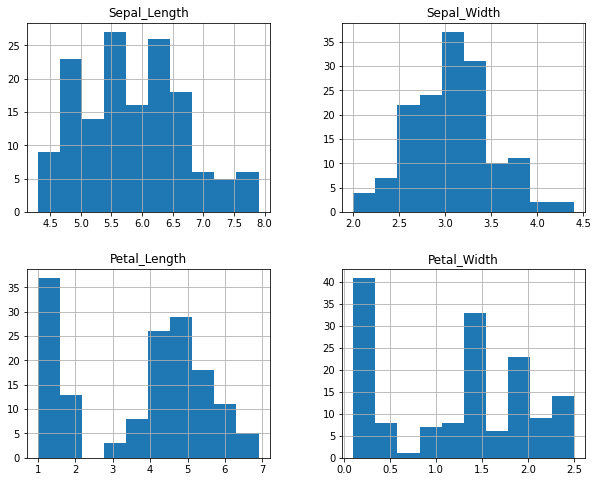

In [70]:
#EXAMPLE 2
#Using a histogram 
df.hist(figsize=(10,8))
plt.show()

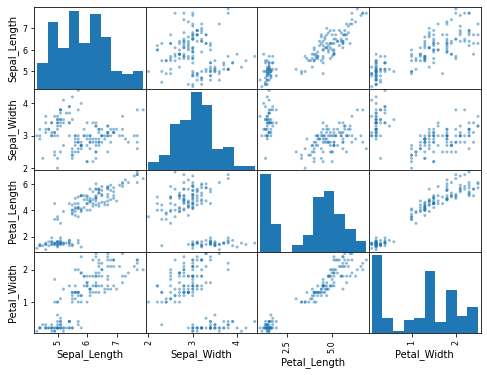

In [71]:
#Using multivariant plot to understant the relationship between diffrebt variable
#Using a scatter plot
scatter_matrix(df, figsize=(8, 6))
plt.show()

# **CREATING MODELS**

In [72]:
#Creating a validation Dataset
#Ths in involves spliting our daset into two part the larger percentage eg*0% will be used to train the model 
#and the rest will be used to validate/ to verify the trained model

array = df.values
#selecting the fist 4clumns(sepal length, sepal width, petal length and petal width)
x = array[:,0:4]
#Selecting the last col (class)
y = array[:, 4]

#Stating validation size
validation_size = 0.20

#Seed will help to keep the same randomness in the datset
seed = 6

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [73]:
#Evaluating the acuracy of the model
scoring = 'accuracy'

In [85]:
#BUILDING MODELS AND FINDING THE MOST SUITABLE ONE YO USE

#Checking the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#Evaluating each model inturn
results = []
names = []
seed = 6

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, )
    cv_result = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg = ""

    print(name, cv_result.mean(), cv_result.std())



C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

LR 0.95 0.07637626158259735
LDA 0.975 0.03818813079129868
CART 0.9333333333333332 0.0726483157256779
KNN 0.9583333333333334 0.05590169943749474
NB 0.9666666666666666 0.055277079839256664
SVM 0.95 0.07637626158259735
